# Using Pandas for Time series

Source: https://tomaugspurger.github.io/modern-7-timeseries

In [3]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

In [4]:
gs = web.DataReader("GS", data_source='yahoo', start='2006-01-01',
                    end='2010-01-01')
gs.head().round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.44,124.23,126.70,128.87,6188700.0,108.23
2006-01-04,128.91,126.38,127.35,127.09,4861600.0,106.74
2006-01-05,127.32,125.61,126.00,127.04,3717400.0,106.70
2006-01-06,129.25,127.29,127.29,128.84,4319600.0,108.21
2006-01-09,130.62,128.00,128.50,130.39,4723500.0,109.51


In [5]:
gs.index[0]

Timestamp('2006-01-03 00:00:00')

In [6]:
gs.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2006-12-31')].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.696220
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,108.207947
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,109.509758


In [8]:
gs.loc["2006"].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.696220
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,108.207947
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,109.509758


In [9]:
gs.resample("5d").mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,128.730001,125.877501,126.834999,127.959997,4.771825e+06,107.468870
2006-01-08,132.645000,130.205002,130.349998,131.660000,4.664300e+06,110.576382
2006-01-13,133.395004,131.244995,131.510002,132.924995,3.258250e+06,111.638783
2006-01-18,133.853333,131.656667,132.210002,132.543335,4.997767e+06,111.387131
2006-01-23,136.083997,133.310001,133.771997,135.153998,3.968500e+06,113.723325


In [10]:
gs.resample("5W").agg(["mean", "sum"]).head()

High                      Low                     Open  \
                  mean          sum        mean          sum        mean   
Date                                                                       
2006-01-08  128.730001   514.920006  125.877501   503.510002  126.834999   
2006-02-12  137.738750  3305.729996  135.133750  3243.210007  135.886667   
2006-03-19  145.639584  3495.350006  142.915831  3429.979950  144.235001   
2006-04-23  160.040420  3840.970078  157.057917  3769.390015  158.087916   
2006-05-28  158.530400  3963.260010  154.512399  3862.809982  157.042402   

                              Close                     Volume               \
                    sum        mean          sum          mean          sum   
Date                                                                          
2006-01-08   507.339996  127.959997   511.839989  4.771825e+06   19087300.0   
2006-02-12  3261.279999  136.628333  3279.080002  4.193379e+06  100641100.0   
2006-03-19  3461.640015  144.399166  3465.579987  3.842721e+06   92225300.0   
2006-04-23  3794.109985  158.730833  3809.539993  4.240908e+06  101781800.0   
2006-05-28  3926.060043  156.237999  3905.949982  4.730056e+06  118251400.0   

             Adj Close               
                  mean          sum  
Date                                 
2006-01-08  107.468870   429.875481  
2006-02-12  114.894530  2757.468712  
2006-03-19  121.502521  2916.060501  
2006-04-23  133.573778  3205.770683  
2006-05-28  131.737671  3293.441772

In [11]:
gs.resample("6H").mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 00:00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-03 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167


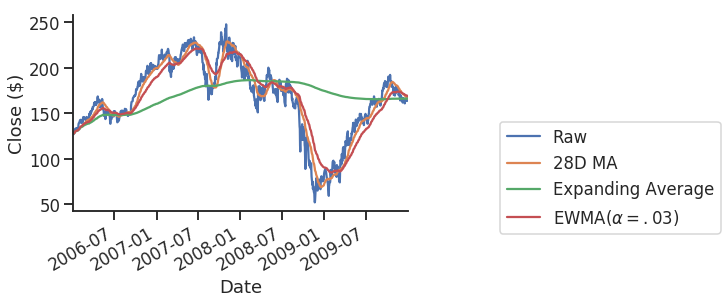

In [23]:
gs["Close"].plot(label='Raw')
gs["Close"].rolling(28).mean().plot(label='28D MA')
gs["Close"].expanding().mean().plot(label='Expanding Average')
gs["Close"].ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, .5))
# plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

In [24]:
roll = gs["Close"].rolling(30, center=True)
roll

Rolling [window=30,center=True,axis=0]

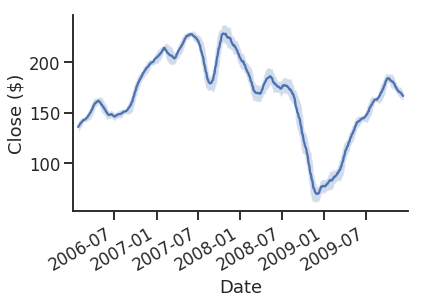

In [25]:
m = roll.agg(["mean", "std"])
ax = m['mean'].plot()
ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'],
                alpha=.25)
# plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

In [27]:
gs.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [26]:
gs.index + pd.DateOffset(months=3, days=-2)

DatetimeIndex(['2006-04-01', '2006-04-02', '2006-04-03', '2006-04-04',
               '2006-04-07', '2006-04-08', '2006-04-09', '2006-04-10',
               '2006-04-11', '2006-04-15',
               ...
               '2010-03-15', '2010-03-16', '2010-03-19', '2010-03-20',
               '2010-03-21', '2010-03-22', '2010-03-26', '2010-03-27',
               '2010-03-28', '2010-03-29'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [28]:
from pandas.tseries.holiday import USColumbusDay
USColumbusDay.dates('2015-01-01', '2020-01-01')

DatetimeIndex(['2015-10-12', '2016-10-10', '2017-10-09', '2018-10-08',
               '2019-10-14'],
              dtype='datetime64[ns]', freq='WOM-2MON')

In [29]:
# tz naiive -> tz aware..... to desired UTC
gs.tz_localize('US/Eastern').tz_convert('UTC').head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 05:00:00+00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-04 05:00:00+00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167
2006-01-05 05:00:00+00:00,127.320000,125.610001,126.000000,127.040001,3717400.0,106.696220
2006-01-06 05:00:00+00:00,129.250000,127.290001,127.290001,128.839996,4319600.0,108.207947
2006-01-09 05:00:00+00:00,130.619995,128.000000,128.500000,130.389999,4723500.0,109.509758
